# HW4B: Stochastic Gradient Descent and Lipschitz Extensions

### Bhaven Patel
### 4/30/2019

I worked with Anthony Rentsch, Lipika Ramaswamy, and Karina Huang on this homework.

My code can be found on my [Github](https://github.com/bhavenp/cs208/blob/master/homework/HW4b/HW4b_Bhaven_Patel.ipynb).

## Problem 1
### (a)

$G = \mathbb{R}^n$, $H = [a,b]^n$, $x\sim x'$ differ on one row, $f(x) = \dfrac{1}{n} \sum_{i=1}^n x_i$

**(i)**<br>
The global sensitivity $GS_f(x) = \infty$ because we can change any value in the dataset $x$ from to $\infty$ (or some arbitrarily large number) to get a neighboring dataset $x'$. Thus, this would change the mean by $\infty$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = \infty$ because the best case dataset $x$ would be a one-value dataset/array $x=[x_1]$, where $x_1$ is any value. The worst case neighboring dataset $x'$ would be a one-value dataset/array $x'=[x'_1]$, where $x'_1 = \infty$ (or some very large number). Thus, the difference between $f(x)$ and $f(x')$ would be infinite like the global sensitivity case.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = \dfrac{b-a}{n}$ because in the worst case we have a dataset $x=[a]^n$ and a neighboring dataset $x'=[a,...,a, b]$, so the difference between $f(x)$ and $f(x')$ would be $\dfrac{b-a}{n}$, which is much less than the global sensitivity or the minimum local sensitivity.
<br>
<br>

**Lipschitz entension**<br>
A Lipschitz entension of $f$ would be
$$
f'(x) = \dfrac{1}{n} \sum_{i=1}^n [x_i]_a^b
$$
where each $x_i$ is clipped to be between $a$ and $b$. 

This obeys the first condition of a Lipschitz entension that $f'(x)$ agrees with $f(x)$ on $H$ because any datasets $x \in H$ are already clipped so the elements $x_i$ are between $a$ and $b$, so $f'(x) = f(x)$.

$f'(x)$ also obeys the second condition of a Lipschitz entension that $GS_{f'} = RS_{f'}^H$ because the $GS_{f'}=\dfrac{b-a}{n}$ because all the values in the datasets $x$ and $x'$ will be clipped to be between $a$ and $b$, so the worst case difference between $f'(x)$ and $f'(x')$ is $\dfrac{b-a}{n}$. $RS_{f'}^H =\dfrac{b-a}{n}$ too because $x \in H$ means all the values in the dataset $x$ will be clipped to be between $a$ and $b$, so the worst case difference between  $f'(x)$ and $f'(x')$, where $x,\,x' \in H$, is also $\dfrac{b-a}{n}$.

Thus, $f'(x)$ is a Lipschitz entension of $f$.

### (b)
$G = \mathbb{R}^n$, $H = [a,b]^n$, $x\sim x'$ differ on one row, $f(x) = \text{median}(x_1,...,x_n)$

**(i)**<br>
The global sensitivity $GS_f(x) = \infty$ because say the dataset $x$ is composed of $0$s and $\infty$s (or some arbitrarily large numbers), where there is 1 more $0$ than $\infty$ so $f(x)=0$. In the worst case, a neighboring dataset $x'$ would have one of the $0$s changed to an $\infty$, so $f(x')=\infty$. Thus, the median has changed by $\infty$, so $GS_f(x) = \infty$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = 0$ because the best case dataset $x$ would be $x=[0]^n$, so $f(x)=0$. The worst case neighboring dataset $x'$ would be dataset $x'=[0,...,0, \infty]$, and $f(x')=0$. Thus, the difference between $f(x)$ and $f(x')$ would be 0.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = b-a$ because in the worst case we have a dataset $x$ composed of $a$s and $b$s, where there is 1 more $a$ than $b$ so $f(x)=a$. In the worst case, a neighboring dataset $x'$ would have one of the $a$s changed to a $b$, so $f(x')=b$. Thus, the median has changed by $b-a$, so $RS_f^H = b-a$. 

### (c)
$G = \text{the set of undirected graphs}$, $H = \text{the set of graphs in G in which every vertex has degree at most }d,\; 2 \leq d \leq n − 1$,<br> 
$x\sim x'$ differ on one node/vertex, $f(x) = \text{# of isolated vertices}$

**(i)**<br>
The global sensitivity $GS_f(x) = n$, where $n$ is the number of nodes/vertices in graph $x$. In the worst case, the graph $x \in G$ can be composed of $n$ isolated vertices, $f(x)=n$. A neighboring graph $x'$ is the same as $x$ except for an additional vertex that shares an edge with every other node, making $f(x') = 0$ . Thus, difference between $f(x)$ and $f(x')$ is at maximum $n$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = 1$ because the best case graph $x$ would have 0 isolated vertices, so $f(x)=0$. The worst case neighboring graph $x'$ would be $x$ plus an isolated vertex, so $f(x') = 1$. Thus, difference between $f(x)$ and $f(x')$ is at maximum $1$, which is the same for the global sensitivity.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = d-1$ because in the worst case, a graph $x \in H$ consists of $d$ vertices where $d-1$ vertices are connected to a single vertex and have no other edges. For the graph $x$, $f(x)=0$. Then, we could have a neighboring graph $x'$ in which the single vertex in $x$ that was connected to the $d-1$ vertices is removed. Thus, $f(x')=d-1$ because there are $d-1$ isolated vertices.

## Problem 2

**Local model for DP-SGD**<br>
Below is my implementation of the local model for DP-SGD. I changed it from the centralized model for DP-SGD because for every subject $i$ in my batch $S_t$, I compute a noisy gradient for the current $\theta$s/parameters by calculating the actual gradient and then adding noise sampled from the Gaussian distribution $N(0, \tau^{2}I)$, where
$$
\tau = \left(\dfrac{C}{\epsilon_0 / 2}\right) \cdot \sqrt{T \cdot \frac{L}{n} \cdot \log \left(\frac{1}{\delta}\right) }
$$

$C$ is the clipping parameter. $\epsilon_0$ is our total privacy-loss parameter specified by the user; we divide it by two because we are releasing two $\theta$s/parameters. $\delta$ is our also our user-specified parameter for ($\epsilon$, $\delta$)-DP. $T$ is the number of steps, $L$ is the batch size, and $n$ is the number of training points. 

In [1]:
## Here is the likelihood function for a Logit. 'b' is array of betas
calcllik<-function(b,data){           
  y<-data[,1]
  x<-data[,2]

  pi<- 1/(1+exp(-b[1] - b[2]*x))        # Here is the systematic component
  llik<-y * log(pi) + (1-y) * log(1-pi) # Here is the stocastic component
    
  return(-llik)
}

## Differentially private mean release
gaussianReleaseNoise <- function(size=1, sensitivity, epsilon, delta){
	scale <- sensitivity *log(1.25/delta)/ epsilon
	noise <- rnorm(n=size, mean=0, sd=scale)
	return(noise)
}

## Bound/Censor/Clip a variable to a range
clip <- function(x, lower, upper){
	x.clipped <- x
	x.clipped[x.clipped<lower] <- lower
	x.clipped[x.clipped>upper] <- upper
	return(x.clipped)	
}

In [2]:
#load the Massachusetts PUMS data
library("foreign");
PUMSdata <- read.csv(file="https://raw.githubusercontent.com/privacytoolsproject/cs208/master/data/MaPUMS5full.csv");     

marg_educ_data <- PUMSdata[c("married","educ")]; #get married and education data

#predict are you married {0,1} based on education
output <- glm(married ~ educ, family="binomial", data=marg_educ_data)


In [3]:
# Calculate the gradient at a point in the parameter space
calcgradient_localRelease <- function(row, C, thetas, fun, noise_sigma){
	dx <- 0.0001
    #using numerical approximation of gradient for each theta. Assuming two thetas
	out1 <-	eval(fun(b=thetas, data=row))
	out2 <- eval(fun(b=thetas + c(0,dx), data=row))
	out3 <- eval(fun(b=thetas + c(dx,0), data=row))
    
    #calculate clipped gradient for theta1
	theta1_grad <- (out3 - out1) / dx;
	theta1_grad <- clip(theta1_grad, lower=-C, upper=C);
    
    #calculate clipped gradient for theta2
	theta2_grad <- (out2 - out1) / dx;               
	theta2_grad <- clip(theta2_grad, lower=-C, upper=C);
    
    #add Gaussian noise to gradients
    thetas_grad <- c(theta1_grad, theta2_grad) + rnorm(n=length(thetas), mean=0, sd=noise_sigma);

	return(thetas_grad);
}


In [5]:
# ##function to perform local model for SGD
# ##
# ## data: 2-column dataframe where first 
# ## N: number of training data points
# ## batch_size: number of training points to be considered in each step
# ## steps: number of iterations to perform local SGD for
# ## C: clipping parameter for gradient
# ## epsilon: privacy-loss parameter
# ## delta: privacy-loss parameter
localSGD <- function(data, N, batch_size, steps, C, epsilon, delta=1e-6){
    
    thetas <- c(0,0)   # Starting parameters
    nu <- c(0.1, 0.01); #c(1,0.01)   # Learning speeds for each theta
    history <- matrix(NA, nrow=steps+1, ncol=2);
    history[1,] <- thetas;

    # Iterate one step of SGD
    for(i in 1:steps){

        #Generate our batch for this step
        startB <- ((i-1)*batch_size+1) #beginning index for our batch
        if(i<batch_size){#get end index for our batch
            stopB <- i*batch_size;
        }else{
            stopB <- nrow(data)
        }
        B <- data[startB:stopB, ]; #get rows for this batch

        #calculate gradient separately for each point
        tot_gradient <- c(0,0);
        sigma = C / (epsilon/2) * sqrt( steps*batch_size/N * log(1/delta) ); #calculate the sigma for Gaussian noise

        for(b in 1:nrow(B)){
            single_row <- B[b, ]; #get row from the data
            #calculate the gradient for this data point
            # 'C' is the clipping parameter. 'thetas' are our parameters to estimate, 'fun' is the our loss function.
            # 'noise_sigma' is the standard deviation for the normal with which noise should be added to the 
            grad_i <- calcgradient_localRelease(single_row, C, thetas, fun=calcllik, noise_sigma=sigma);
    #         cat(grad_i,"\n")
            tot_gradient <- tot_gradient + grad_i;
        }

        ave_gradient <- tot_gradient / batch_size;
    # 	cat("Del:  ",Del,"\n")
        thetas <- thetas - (nu * ave_gradient);   #theta^(l+1) = theta^(l) - learningRate * gradient
    # 	cat("Theta:",theta, "\n")

        history[i+1,] <- thetas;
    }
    
    return(history);
}

In [38]:
N <- nrow(marg_educ_data);
L <- round(sqrt(N));     # This is the recommended batch size- sqrt(# of training examples)
# set.seed(24);
steps <- L; #number of iterations for SGD is same as the number of batches

## Shuffle the data
index <- sample(1:nrow(marg_educ_data), replace=FALSE); #shuffle because we worry the data may have been sorted in some way
marg_educ_data <- marg_educ_data[index,];
epsilon = 1;
delta = 1e-6;
C <- 10; 			  # Interval to clip over

history <- localSGD(data=marg_educ_data, N=N, batch_size=L, steps=steps, C=C, epsilon=epsilon, delta=1e-6);


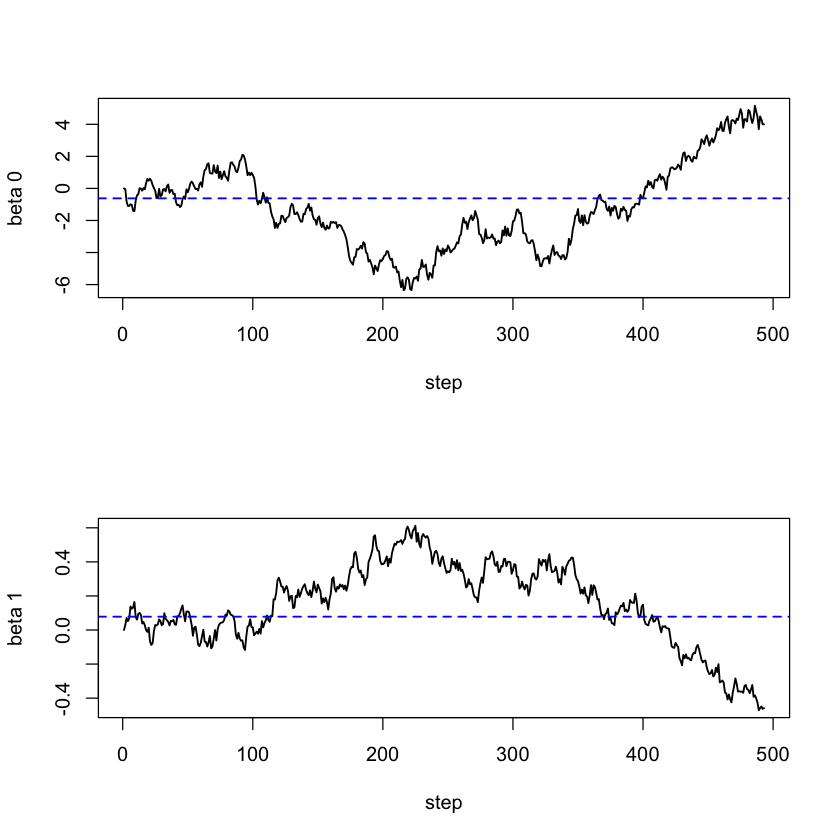

In [39]:
par(mfcol=c(2,1))

all.ylim<-c( min(c(history[,1],output$coef[1] )), max(c(history[,1],output$coef[1] )))
plot(history[,1], type="l", ylim=all.ylim, ylab="beta 0", xlab="step", lwd=1.5)
abline(h=output$coef[1], lty=2, col="blue", lwd=1.5)


all.ylim<-c( min(c(history[,2],output$coef[2] )), max(c(history[,2],output$coef[2] )))
plot(history[,2], type="l", ylim=all.ylim, ylab="beta 1", xlab="step", lwd=1.5)
abline(h=output$coef[2], lty=2, col="blue", lwd=1.5)

# dev.copy2pdf(file="./dpSGD.pdf")

As the plots above show, my `localSGD` function provides a DP-release of $\beta_0$ and $\beta_1$ that are close to true, non-DP $\beta$ values.

**Evaluate performance of the local model of DP-SGD**

In [40]:
### SET-UP PARAMETERS
eps_vals <- c(0.5)# 0.25, 0.5, 0.75, 1.0)#, 2.0, 5.0, 10.0);
num_sims <- 3;
N <- nrow(marg_educ_data);
L <- round(sqrt(N));     # This is the recommended batch size- sqrt(# of training examples)
steps <- L; #number of iterations for SGD is same as the number of batches
delta = 1e-6;
C <- 10; 			  # Interval to clip over

#shuffle because we worry the data may have been sorted in some way
index <- sample(1:nrow(marg_educ_data), replace=FALSE); 
marg_educ_data <- marg_educ_data[index,];

thetas_history <- matrix(0, nrow=length(eps_vals)*num_sims, ncol=3);

row = 1;
for(eps in eps_vals){
    for(l in 1:num_sims){
        #get a DP release of the thetas for the given epsilon
        history <- localSGD(data=marg_educ_data, N=N, batch_size=L, steps=steps, C=C, epsilon=eps, delta=1e-6);
        dp_thetas <- history[L+1, ];
        #calculate classificaiton error for these
        
        thetas_history[row, ] <- c(eps, dp_thetas); #save the thetas and classification error
        
        row <- row + 1;
    }
}


In [41]:
thetas_history

0.5,15.1147329,-1.3548654
0.5,-1.9555870,0.1698949
0.5,-0.2833047,0.1077180
